Plotando S(T)

C:\Users\bolar\AppData\Local\Temp\ipykernel_11804\1755745953.py:6: RuntimeWarning: overflow encountered in cosh
  Z = 1 + np.exp(8 * J / (K * T)) + 2 * np.cosh(2 * h / (K * T))
C:\Users\bolar\AppData\Local\Temp\ipykernel_11804\1755745953.py:8: RuntimeWarning: overflow encountered in sinh
  numerator = 8 * J * np.exp(8 * J / (K * T)) + 4 * h * np.sinh(2 * h / (K * T))
C:\Users\bolar\AppData\Local\Temp\ipykernel_11804\1755745953.py:10: RuntimeWarning: invalid value encountered in divide
  term2 = numerator / denominator


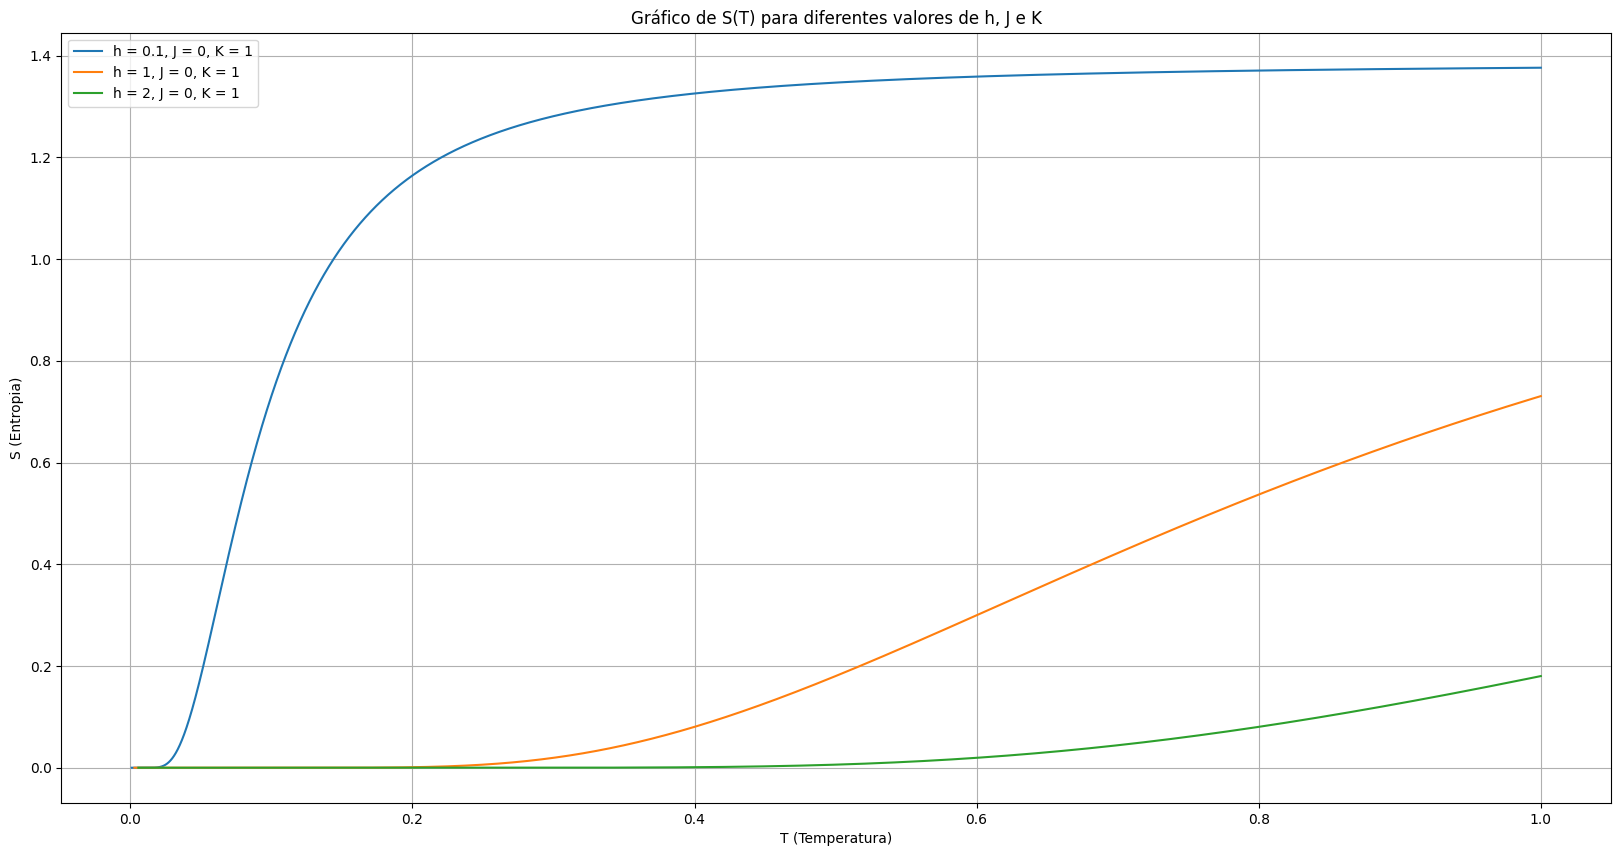

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função S(T)
def S(T, J, K, h):
    Z = 1 + np.exp(8 * J / (K * T)) + 2 * np.cosh(2 * h / (K * T))
    term1 = K * np.log(Z)
    numerator = 8 * J * np.exp(8 * J / (K * T)) + 4 * h * np.sinh(2 * h / (K * T))
    denominator = T * Z
    term2 = numerator / denominator
    return term1 - term2

# Definir os intervalos de T
T_values = np.linspace(0.001, 1, 10000)

# Definir os valores para h, K e J que serão usados nas plotagens
h_values = [0.1, 1, 2]
K_values = [1]
J_values = [0]

# Criar o gráfico
plt.figure(figsize=(20, 10))

# Loop para calcular S(T) para cada combinação de h, K e J e plotar os resultados
for h in h_values:
    for K in K_values:
        for J in J_values:
            S_values = S(T_values, J, K, h)
            plt.plot(T_values, S_values, label=f'h = {h}, J = {J}, K = {K}')

# Adicionar título e rótulos
plt.title('Gráfico de S(T) para diferentes valores de h, J e K')
plt.xlabel('T (Temperatura)')
plt.ylabel('S (Entropia)')

# Incluir a equação no gráfico (opcional)
equation_text = r'$S(T) = K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
#plt.text(6, 0.5, equation_text, fontsize=15, bbox=dict(facecolor='white', alpha=1))

# Exibir a grade, a legenda e o gráfico
plt.grid(True)
plt.legend()
plt.show()

Plotando T(h, J, S). com S contanste, pois queremos o processo adiabático


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os


#Definindo constantes
#BOLTZMANN = 1 # boltzmann constant -> Kb
ANTIFERROMAGNETIC_EXCHANGE_COUPLING = 0.5 #J>=0
ENTROPY = 0 #S tem que ser constante pq o processo é adibático
TEMPERATURE_INITIAL_GUESS = 1 # melhorando o chute inicial para um valor maior
MAGNETIC_FIELD_INITIAL = 2 # O valor inicial do campo magnético
MAGNETIC_FIELD_FINAL = 1 #O valor final do campo magnético

def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)


#definindo a função T(h), o único parâmetro é h pois é a única coisa que vai mudar de h_i até h_f
def Temp(ANTIFERROMAGNETIC_EXCHANGE_COUPLING, temperature, magnetic_field, ENTROPY):
    
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp((8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature)) + 
        (
            2 * 
            np.cosh((2 * magnetic_field) / (temperature))
        )
    )
    term1 = (ENTROPY * (-1)) + (np.log(Z))
    numerator = (                
            (
                8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING * 
                np.exp((8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature))
            ) + 
            (
                4 * magnetic_field * 
                np.sinh((2 * magnetic_field) / (temperature))
            )
        )
    denominator = temperature * Z
    term2 =  numerator / denominator
    calculated_temperature = term1 - term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    return calculated_temperature


def calc_BTandBS(J, MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, TEMPERATURE_INITIAL_GUESS, ENTROPY, INTERVAL, initialOrFinal):

    #definindo os intervalos de h
    magnetic_fields = np.linspace(MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, INTERVAL)
    B = magnetic_fields
    temperatures = []
    temperature_guess = TEMPERATURE_INITIAL_GUESS
    
    
    
    S_values = np.zeros_like(B)
    T_values = np.zeros_like(B)
    B_values = np.zeros_like(B)
    M_values = np.zeros_like(B)
    temperatures = []


    for i, magnetic_field in enumerate(magnetic_fields):
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        try:
            calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)
            temperature_guess = calculated_temperature[0]
            T_val = calculated_temperature[0]
            print(f"B: {magnetic_field}")
            if (log_detailed_calculation(magnetic_field)):
                print(f"Final Result={calculated_temperature}")
            
            T_values[i] = T_val
            B_values[i] = magnetic_field
            S_values[i] = round(Temp(J, T_values[i], B_values[i], ENTROPY), 5)
            M_values[i] = Magnetized(J, B_values[i], T_values[i])
            
            print(f"#{i}:Temp_calculed: {calculated_temperature[0]}, Entropia: {S_values[i]}")
            #Update temperature guess with the result of previuos systems
            
            
            #Append the system result to the list of temperatures to be plotted
            temperatures.append(calculated_temperature[0])  # Adiciona o valor encontrado para T
        except RuntimeWarning:
            temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
            
    #print(f"T_i: {T_values[0]}, T_f: {T_values[-1]}, B_i: {B_values[0]}, B_f: {B_values[-1]}.")
            
    
    print(f"Valor retornado: {T_values[initialOrFinal]}")
    
    return [T_values[initialOrFinal],B_values,T_values,S_values,M_values]
    
    #plt.figure(figsize=(10,10))
    # Incluir a equação no gráfico (opcional)
    #equation_text = r'$f(T,S,h,J) = -S + K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
    #plt.text(0.3, 0.95, equation_text, fontsize=10, bbox=dict(facecolor='white', alpha=1), clip_on=False, transform=plt.gcf().transFigure)
    #plt.plot(magnetic_fields, temperatures)
    # Adicionar título e rótulos
    #plt.title(f"Gráfico de T(S,h,J) T_i=[{TEMPERATURE_INITIAL_GUESS}], h_i=[{MAGNETIC_FIELD_INITIAL}] , h_f=[{MAGNETIC_FIELD_FINAL}], J=[{ANTIFERROMAGNETIC_EXCHANGE_COUPLING}],S=[{ENTROPY}],k_b=[{BOLTZMANN}]")
    #plt.xlabel('h (Campo Magnético)')
    #plt.ylabel('T (Temperatura)')
    # Exibir a grade, a legenda e o gráfico
    #plt.grid(True)
    #plt.legend()
    #plt.show()

In [56]:
def Magnetized(ANTIFERROMAGNETIC_EXCHANGE_COUPLING, magnetic_field, temperature):
    
    Z = (                                                          
        1 + 
        np.exp((8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature)) + 
        (
            2 * 
            np.cosh((2 * magnetic_field) / (temperature))
        )
    )
    
    term1 = (4*np.sinh((2*magnetic_field)/temperature))
    
    magnetizetion = term1/Z
    
    return magnetizetion
    
    

In [7]:
def plot_BTeBSeBM(B_values, T_values, S_values, M_values):
    #Plotando os gráficos
    plt.figure(figsize=(20, 5))

    # Gráfico B vs T
    plt.subplot(1, 3, 1)
    plt.plot(B_values, T_values, 'b-')
    plt.xlabel('B')
    plt.ylabel('T')
    plt.title('T vs B')
    plt.grid(True)

    # Gráfico B vs S
    plt.subplot(1, 3, 2)
    plt.plot(B_values, S_values, 'r-')
    plt.xlabel('B')
    plt.ylabel('S')
    plt.title('S vs B')
    plt.grid(True)
    
        # Gráfico B vs S
    plt.subplot(1, 3, 3)
    plt.plot(B_values, M_values, 'r-')
    plt.xlabel('B')
    plt.ylabel('M')
    plt.title('M vs B')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

B: 1.0
#0:Temp_calculed: 2.184782745281191, Entropia: -0.0
B: 1.1111111111111112
#1:Temp_calculed: 2.181828607776734, Entropia: 0.0
B: 1.2222222222222223
#2:Temp_calculed: 2.1821459771335094, Entropia: -0.0
B: 1.3333333333333333
#3:Temp_calculed: 2.1873453104005565, Entropia: 0.0
B: 1.4444444444444444
#4:Temp_calculed: 2.199389522644045, Entropia: -0.0
B: 1.5555555555555556
#5:Temp_calculed: 2.2205189374579293, Entropia: -0.0
B: 1.6666666666666665
#6:Temp_calculed: 2.2530408487768834, Entropia: -0.0
B: 1.7777777777777777
#7:Temp_calculed: 2.2989709715454003, Entropia: 0.0
B: 1.8888888888888888
#8:Temp_calculed: 2.3596107469352043, Entropia: -0.0
B: 2.0
#9:Temp_calculed: 2.43524340732291, Entropia: -0.0
Valor retornado: 2.184782745281191


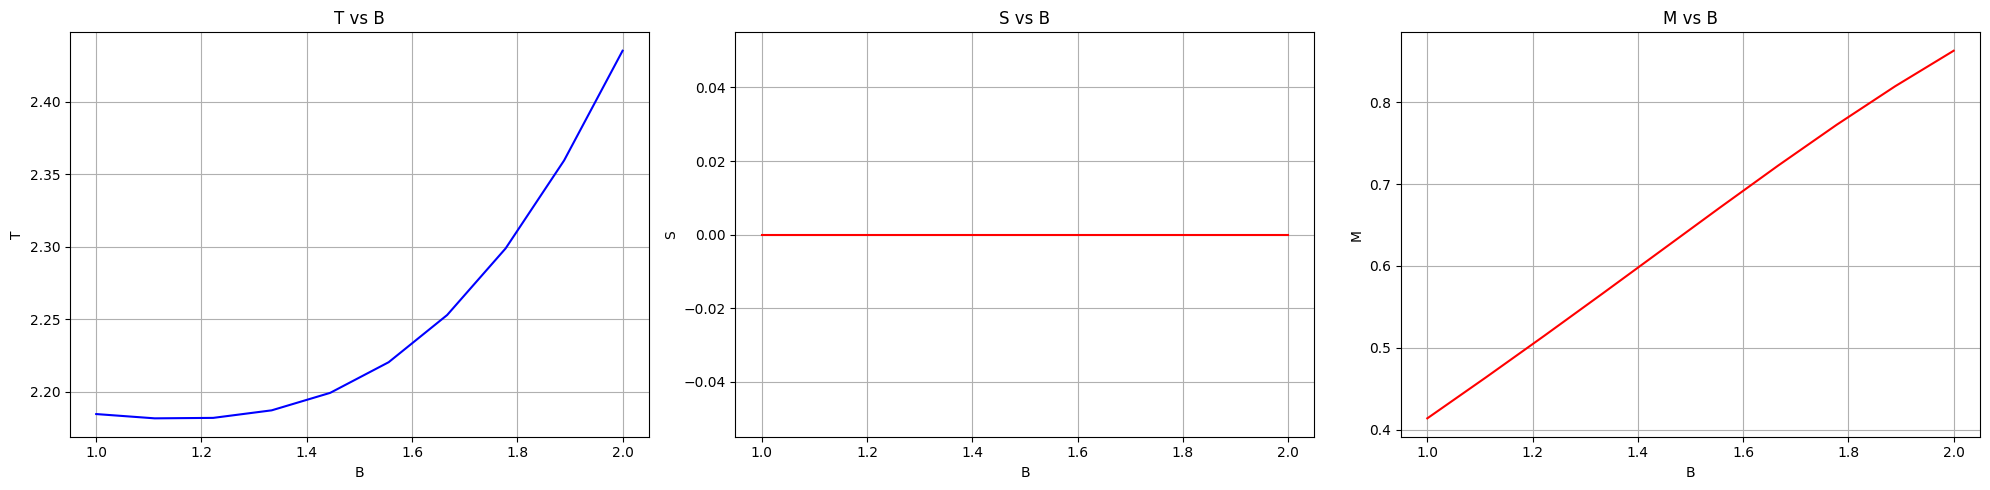

In [8]:
J = 0.5
hi = 1
hf = 2
T_guess = 1
ENTROPY = 1
INTERVAL = 10
initialOrFinal = 0 # [0] para o primeiro item da lista OU [-1] para o último item da lista

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, ENTROPY, INTERVAL, initialOrFinal)

plot_BTeBSeBM(B_values, T_values, S_values, M_values)



Energia Interna:

In [9]:
def internal_Energy(J, h, temperature):
    Z = (
            (
                1
            )
                +
            (
                np.exp((8 * J) / (temperature))
            )            
                +            
            (
                2 * 
                np.cosh((2 * h) / (temperature))
            )
    )
    
    numerador = (
                    np.exp(
                        (8*J)/temperature
                    )        
                    +
                    (
                        (4*h)*np.sinh(
                            (2*h/temperature)
                        )
                    )
    
    )
    
    U = (((-1)*numerador)/Z)
    
    return U

Temperatura no processo adiabático:

In [10]:
def adiabatic_Temperature(temperature, magnetic_field):
    BOLTZMANN = 1
    
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp(8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING / (BOLTZMANN * temperature)) + 
        (
            2 * 
            np.cosh(2 * magnetic_field / (BOLTZMANN * temperature))
        )
    )
    term1 = (ENTROPY * (-1)) + (BOLTZMANN * np.log(Z))
    numerator = (                
            (
                8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING * 
                np.exp(8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING / (BOLTZMANN * temperature))
            ) + 
            (
                4 * magnetic_field * 
                np.sinh(2 * magnetic_field / (BOLTZMANN * temperature))
            )
        )
    
    
    denominator = temperature * Z
    term2 =  numerator / denominator
    calculated_temperature = term1 - term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    return calculated_temperature

Campo magnético:

In [11]:
def final_Temperature(INTERVAL, MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, temperature_guess, lastOrFirst):
    
    #definindo os intervalos de h
    magnetic_fields = np.linspace(MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, INTERVAL)
    #definindo temperatures como uma lista de valores, para os diferentes valores de campos magnético
    temperatures = []



    for magnetic_field in magnetic_fields:
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        try:
            calculated_temperature = fsolve(lambda temperature: adiabatic_Temperature(temperature, magnetic_field), temperature_guess)
            if (log_detailed_calculation(magnetic_field)):
                print(f"Final Result={calculated_temperature}")
            
            #Update temperature guess with the result of previuos systems
            temperature_guess = calculated_temperature[0]
            
            #Append the system result to the list of temperatures to be plotted
            temperatures.append(calculated_temperature[0])  # Adiciona o valor encontrado para T
        except RuntimeWarning:
            temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
    print(f"Temperatura final:{temperatures[lastOrFirst]}")
    
    
    return temperatures[lastOrFirst] 


O calor e o trabalho vai ser calculado através da variação da energia interna em cada processo, i.e., $W= \Delta U$ ou $\Delta Q = U$ em cada um dos processo. De forma mais clara:

 - $W_{out} = U_{B} - U_{A}$  ||
  $(T_c, \lambda_i) \rightarrow (T_{c}^*, \lambda_f)$;

 - $Q_{h} = U_{C} - U_{B}$    ||
  $(T_{c}^*, \lambda_f) \rightarrow (T_h, \lambda_f)$;

 - $W_{in} = U_{D} - U_{C}$   ||
  $(T_h, \lambda_f) \rightarrow (T_{c}^*, \lambda_i)$;

 - $Q_{c} = U_{D} - U_{A}$    ||
  $(T_{c}^*, \lambda_i) \rightarrow (T_c, \lambda_i)$.  


NOTA: As temperaturas $T_c^*$ e $T_h^*$ são as temperaturas obtidas através da solução da equação $f(J,h,T,S) = 0$, para $S$ constante. A priori, $T_c$ e $T_h$ são fixas, pois são macroscópicas. 

$W_{out}:$

In [12]:
def out_Work(J, hi, hf, Tc, ENTROPY, INTERVAL, initialOrFinal):
    
    
    
    Ua = internal_Energy(J, hi, Tc)
    
    add_Th = calc_BTandBS(J, hi, hf, Tc, ENTROPY, INTERVAL, initialOrFinal)[0]
    Ub = internal_Energy(J, hf, add_Th)
    
    work_out = Ub - Ua
    
        
    return [work_out, add_Th]

$W_{in}:$

In [69]:
def in_Work(J, hi, hf, Th, ENTROPY, INTERVAL, initialOrFinal):
    
    Uc = internal_Energy(J, hi, Th)
        
    add_Tc = calc_BTandBS(J, hi, hf, Th, ENTROPY, INTERVAL, initialOrFinal)[0]        
    Ud = internal_Energy(J, hf, add_Tc)
    
    work_in = Ud - Uc
    
    
    return [work_in, add_Tc]

$Q_h:$

In [14]:
def hot_Q(J, hf, Th, add_Tc):
    
    Uc = internal_Energy(J, hf, Th)
    Ub = internal_Energy(J, hf, add_Tc)    
    
    Q_hot = Uc - Ub
    
    return Q_hot

$Q_c:$

In [15]:
def cold_Q(J, hi, Tc, add_Th):
    
    
    Ua = internal_Energy(J, hi, Tc) 
    Ud = internal_Energy(J, hi, add_Th)
    
    Q_cold = Ud - Ua
    
    return Q_cold

B: 1.0
#0:Temp_calculed: 1.4408096062929772, Entropia: -0.0
B: 1.1111111111111112
#1:Temp_calculed: 1.6008995625477522, Entropia: 0.0
B: 1.2222222222222223
#2:Temp_calculed: 1.7609895188024318, Entropia: -0.0
B: 1.3333333333333333
#3:Temp_calculed: 1.9210794750572675, Entropia: -0.0
B: 1.4444444444444444
#4:Temp_calculed: 2.081169431312064, Entropia: -0.0
B: 1.5555555555555556
#5:Temp_calculed: 2.241259387566848, Entropia: -0.0
B: 1.6666666666666665
#6:Temp_calculed: 2.4013493438216256, Entropia: -0.0
B: 1.7777777777777777
#7:Temp_calculed: 2.561439300076403, Entropia: -0.0
B: 1.8888888888888888
#8:Temp_calculed: 2.7215292563311784, Entropia: -0.0
B: 2.0
#9:Temp_calculed: 2.881619212585954, Entropia: -0.0
Valor retornado: 2.881619212585954
Valor add_Tc: 2.881619212585954


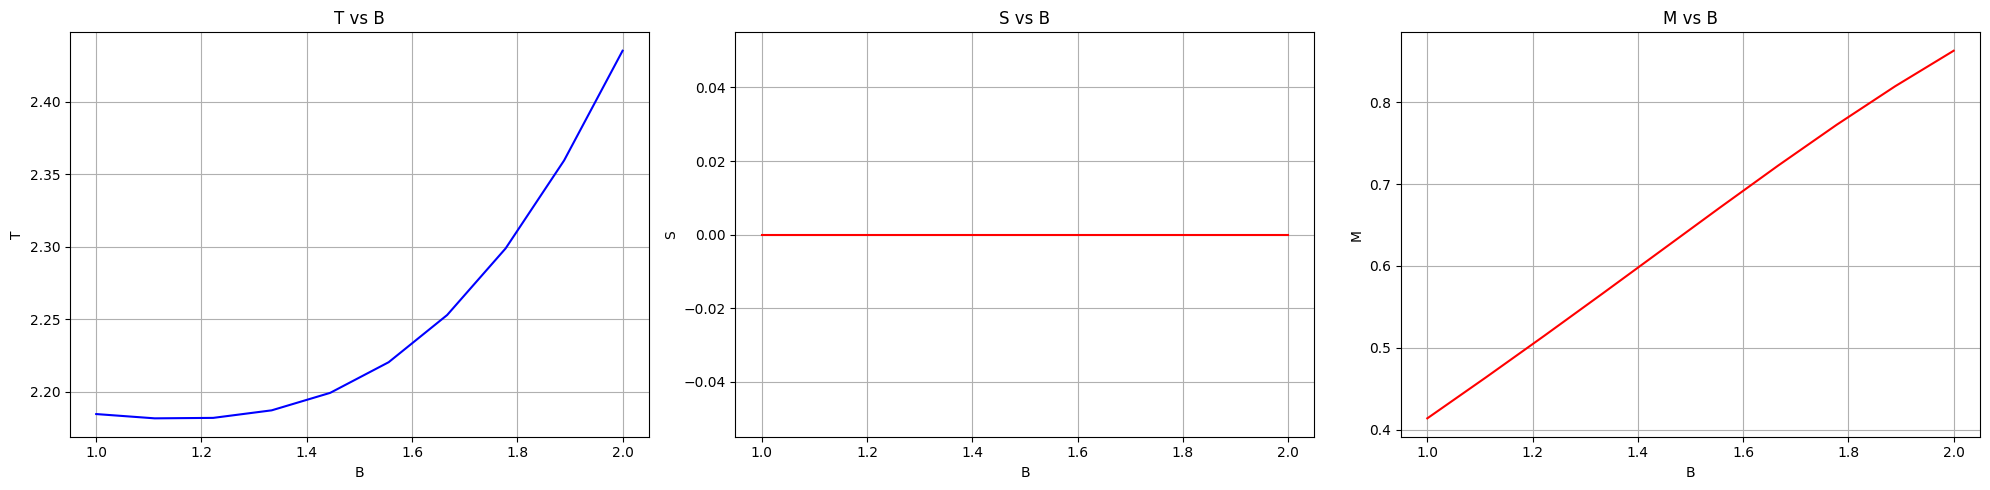

B: 2.0
#0:Temp_calculed: 2.881619212585954, Entropia: -0.0
B: 1.8888888888888888
#1:Temp_calculed: 2.7215292563311797, Entropia: 0.0
B: 1.7777777777777777
#2:Temp_calculed: 2.561439300076405, Entropia: 0.0
B: 1.6666666666666667
#3:Temp_calculed: 2.4013493438216322, Entropia: 0.0
B: 1.5555555555555556
#4:Temp_calculed: 2.241259387566862, Entropia: 0.0
B: 1.4444444444444444
#5:Temp_calculed: 2.0811694313121003, Entropia: 0.0
B: 1.3333333333333335
#6:Temp_calculed: 1.921079475057363, Entropia: 0.0
B: 1.2222222222222223
#7:Temp_calculed: 1.7609895188025266, Entropia: -0.0
B: 1.1111111111111112
#8:Temp_calculed: 1.6008995625477518, Entropia: -0.0
B: 1.0
#9:Temp_calculed: 1.4408096062929772, Entropia: -0.0
Valor retornado: 1.4408096062929772
Valor add_Th: 1.4408096062929772


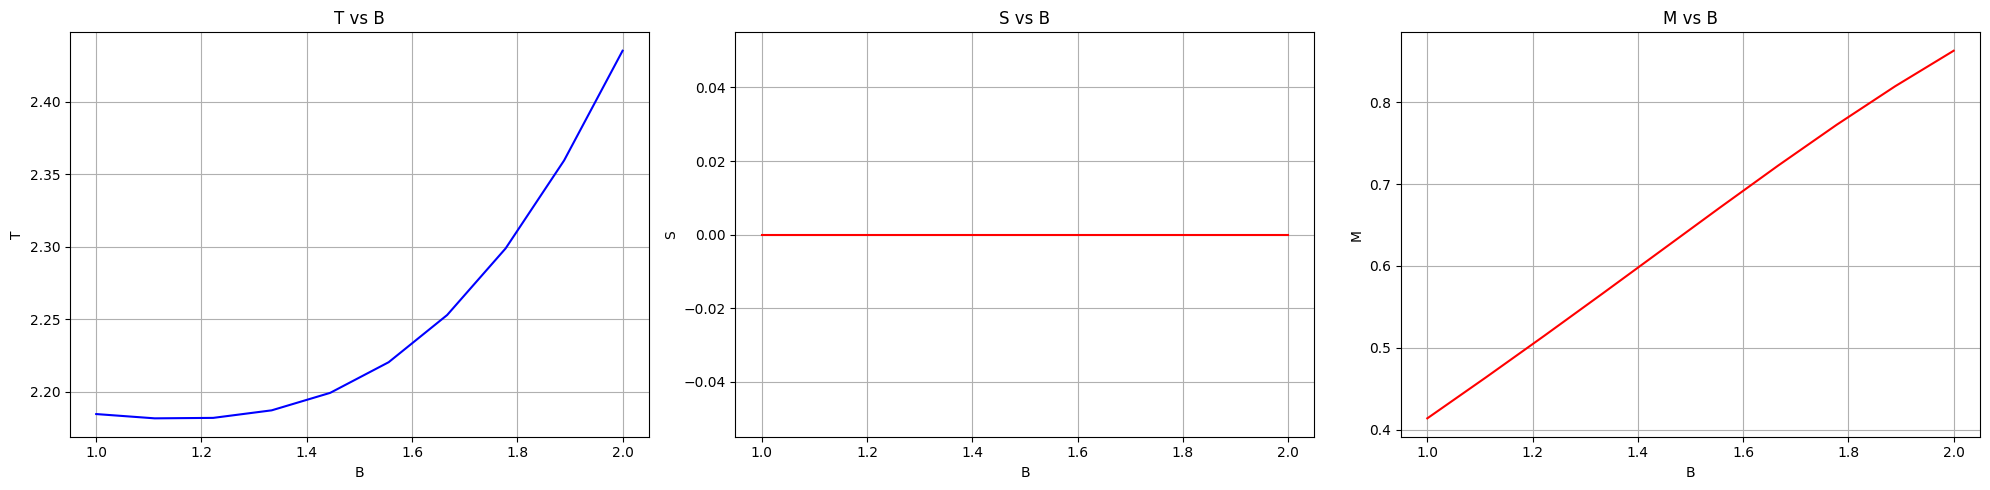

Tc: 1
add_Th(Win):1.4408096062929772
Th: 4
add_Tc(Wout):2.881619212585954
Rendimento: -3.1293080982090253, Win: 0.6840943151215715, Wout: -0.9339647396290047, Qhot: 0.51706607466252, Qcold: 0.26719565015508673


In [16]:
J = 0
hi = 1
hf = 2
Tc = 1
Th = 4
ENTROPY = 1
INTERVAL = 10
initialOrFinal = -1

#[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, ENTROPY, INTERVAL, initialOrFinal)

[Wout, add_Tc] = out_Work(J, hi, hf, Tc, ENTROPY, INTERVAL, initialOrFinal)
print(f"Valor add_Tc: {add_Tc}")
plot_BTeBSeBM(B_values, T_values, S_values, M_values)

###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
[Win, add_Th] = in_Work(J, hf, hi, Th, ENTROPY, INTERVAL, initialOrFinal)
print(f"Valor add_Th: {add_Th}")
plot_BTeBSeBM(B_values, T_values, S_values, M_values)
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win


Qhot = hot_Q(J, hf, Th, add_Tc)
Qcold = cold_Q(J, hi, Tc, add_Th)


print(f"Tc: {Tc}")
print(f"add_Th(Win):{add_Th}")

print(f"Th: {Th}")
print(f"add_Tc(Wout):{add_Tc}")



eta = (+Wout - Win)/Qhot

print(f"Rendimento: {eta}, Win: {Win}, Wout: {Wout}, Qhot: {Qhot}, Qcold: {Qcold}")

Fazendo o gráfico $T_{a}$ X $T_{b}$. A intenção é determinar qual é o melhor range de temperaturas para a máquina operar para determinado $J$, $B_i$ e $B_f$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def TaXTb(J, hi, hf, ENTROPY, INTERVAL, IINTERVAL, initialOrFinal):
    
    # 3. Criar uma grade para Ta e Tb
    T_a = np.linspace(0.1, 20, IINTERVAL)  # Valores de T_a de 0 até 20 com 200 pontos
    T_b = np.linspace(0.1, 20, IINTERVAL)  # Valores de T_b de 0 até 20, com 200 pontos
    Ta_grid, Tb_grid = np.meshgrid(T_a, T_b) #Criando a "Matriz" de valores T_a e T_b
    print(type(Ta_grid))
    # 4. Calcular os valores de W_ciclo, Q_hot e Q_cold para cada um dos elementos da matriz T_a X T_b

    #ATENÇÃO!!!
    #ATENÇÃO!!!
    #ATENÇÃO!!!
    #ATENÇÃO!!!
    # NESSE CASO, EU VOU FAZER COM QUE AS TEMPERATURAS DE QH E QC SEJAM DEFINIDAS PELO RESULTADO OBTIDO DEPOIS DO PROCESSO ADIABÁTICO NOS TRABALHOS. 
    # EM SEGUIDA, EM OUTRO CODE, VOU FAZER UM CASO LIVRE. ONDE A IDEIA É NÃO DEPENDER DESSE RETURN DOS TRABALHOS.
    
    
    W = np.zeros_like(Ta_grid)
    Qh = np.zeros_like(Ta_grid)
    Qc = np.zeros_like(Ta_grid)
    
    for k, Tb in enumerate(Tb_grid):
        for i, Ta in enumerate(Ta_grid):
        
            [out_W, add_Tc] = out_Work(J, hi, hf, Ta, ENTROPY, INTERVAL, initialOrFinal)    
            [in_W, add_Th] = in_Work(J, hf, hi, Tb, ENTROPY, INTERVAL, initialOrFinal)
            Qhh = hot_Q(J, hi, Tb_grid, add_Tc)
            Qcc = cold_Q(J, hf, Ta_grid, add_Th)
        
        
    W = out_W - in_W
    Qh = Qhh
    Qc = Qcc
    
    
    
        # 5. Identificar as regiões
    regions = np.zeros_like(W, dtype=float)

    # Máquina
    regions[(W > 0)] = 1

    # Acelerador
    regions[(W < 0) & (Qh > 0) & (Qc < 0) & (Ta_grid < Tb_grid)] = 2

    ## Refrigerador
    #regions[(W < 0) & (Qc > 0) & (Ta_grid < Tb_grid) or (W < 0) | (Qh > 0) & (Ta_grid > Tb_grid)] = 3
    conditions = ((W < 0) & (Qc > 0) & (Ta_grid < Tb_grid)) | ((W < 0) & (Qh > 0) & (Ta_grid > Tb_grid))
    regions[conditions] = 3

    # Aquecedor
    regions[(W < 0) & (Qh < 0) & (Qc < 0)] = 4
    
    # 6. Plotar as regiões
    #plt.figure(figsize=(8, 6))
    #cmap = plt.cm.get_cmap('viridis', 4)  # Paleta com 4 cores
    #contour = plt.contourf(Tb_grid, Ta_grid, regions, levels=np.arange(5), cmap=cmap)

    # Adicionar barra de cores e legenda
    #cbar = plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5])
    #cbar.ax.set_yticklabels(['Fora', 'Máquina', 'Acelerador', 'Refrigerador', 'Aquecedor'])

    #plt.title("Regiões de Operação")
    #plt.xlabel("Tb")
    #plt.ylabel("Ta")
    #plt.grid(True)
    #plt.show()

        # 6. Plotar as regiões
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores
    contour = plt.contourf(Tb_grid, Ta_grid, regions, levels=np.arange(5), cmap=cmap)

    # Adicionar barra de cores e legenda
    cbar = plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5])
    cbar.ax.set_yticklabels(['Máquina', 'Acelerador', 'Refrigerador', 'Aquecedor'])


    # Adicionar os parâmetros no gráfico
    param_text = (
        f"$h_i = {MAGNETIC_FIELD_INITIAL}$\n"
        f"$h_f = {MAGNETIC_FIELD_FINAL}$\n"
        f"$J = {ANTIFERROMAGNETIC_EXCHANGE_COUPLING}$"
    )
    plt.text(1, 9, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Regiões de Operação")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def TaXTb(J, hi, hf, ENTROPY, INTERVAL, IINTERVAL, initialOrFinal):
    # 3. Criar uma grade para Ta e Tb
    T_a = np.linspace(0.1, 20, IINTERVAL)
    T_b = np.linspace(0.1, 20, IINTERVAL)
    Ta_grid, Tb_grid = np.meshgrid(T_a, T_b)

    # Inicializar matrizes para W, Qh, Qc
    W = np.zeros_like(Ta_grid)
    Qh = np.zeros_like(Ta_grid)
    Qc = np.zeros_like(Ta_grid)

    # 4. Calcular os valores de W_ciclo, Q_hot e Q_cold para cada ponto
    for i in range(Ta_grid.shape[0]):
        for j in range(Ta_grid.shape[1]):
            Ta = Ta_grid[i, j]
            Tb = Tb_grid[i, j]

            out_W, add_Tc = out_Work(J, hi, hf, Ta, ENTROPY, INTERVAL, initialOrFinal)
            in_W, add_Th = in_Work(J, hf, hi, Tb, ENTROPY, INTERVAL, initialOrFinal)

            Qhh = hot_Q(J, hi, Tb, add_Tc)
            Qcc = cold_Q(J, hf, Ta, add_Th)

            W[i, j] = out_W - in_W
            Qh[i, j] = Qhh
            Qc[i, j] = Qcc

    # 5. Identificar as regiões
    regions = np.zeros_like(W, dtype=float)

    # Máquina
    regions[(W > 0)] = 1

    # Acelerador
    regions[(W < 0) & (Qh > 0) & (Qc < 0) & (Ta_grid < Tb_grid)] = 2

    # Refrigerador
    conditions = ((W < 0) & (Qc > 0) & (Ta_grid < Tb_grid)) | ((W < 0) & (Qh > 0) & (Ta_grid > Tb_grid))
    regions[conditions] = 3

    # Aquecedor
    regions[(W < 0) & (Qh < 0) & (Qc < 0)] = 4

    # 6. Plotar as regiões
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores
    contour = plt.contourf(Tb_grid, Ta_grid, regions, levels=np.arange(5), cmap=cmap)

    # Adicionar barra de cores e legenda
    cbar = plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5])
    cbar.ax.set_yticklabels(['Máquina', 'Acelerador', 'Refrigerador', 'Aquecedor'])

    # Adicionar os parâmetros no gráfico
    param_text = (
        f"$h_i = {hi}$\n"
        f"$h_f = {hf}$\n"
        f"$J = {J}$"
    )
    plt.text(1, 9, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Regiões de Operação")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()

In [93]:
J = 0
hi = 1
hf = 2
Tc = 0
Th = 0
ENTROPY = 1
INTERVAL = 10
IINTERVAL = 10
initialOrFinal = -1

TaXTb(J, hi, hf, ENTROPY, INTERVAL, IINTERVAL, initialOrFinal)

TypeError: TaXTb() takes 4 positional arguments but 7 were given

In [22]:
def OUT_IN_HOT_COLD(J, hi, hf, Ta_grid, Tb_grid):
    
    
    
    Ua = internal_Energy(J, hi, Ta_grid)
    Ub = internal_Energy(J, hf, Tb_grid)
    Uc = internal_Energy(J, hf, Tb_grid)
    Ud = internal_Energy(J, hi, Ta_grid)
    
    
    OUT = Ub - Ua
    IN = Ud - Uc
    HOT = Uc - Ub
    COLD = Ud - Ua
        
    return [OUT, IN, HOT, COLD]

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def TaXTb(J, hi, hf, INTERVAL):
    
    # 3. Criar uma grade para Ta e Tb
    T_a = np.linspace(0.1, 20, INTERVAL)  # Valores de T_a de 0 até 20 com 200 pontos
    T_b = np.linspace(0.1, 20, INTERVAL)  # Valores de T_b de 0 até 20, com 200 pontos
    Ta_grid, Tb_grid = np.meshgrid(T_a, T_b) #Criando a "Matriz" de valores T_a e T_b
    
    # 4. Calcular os valores de W_ciclo, Q_hot e Q_cold para cada um dos elementos da matriz T_a X T_b

    #ATENÇÃO!!!
    #ATENÇÃO!!!
    #ATENÇÃO!!!
    #ATENÇÃO!!!
    # NESSE CASO, EU VOU FAZER COM QUE AS TEMPERATURAS DE QH E QC SEJAM DEFINIDAS PELO RESULTADO OBTIDO DEPOIS DO PROCESSO ADIABÁTICO NOS TRABALHOS. 
    # EM SEGUIDA, EM OUTRO CODE, VOU FAZER UM CASO LIVRE. ONDE A IDEIA É NÃO DEPENDER DESSE RETURN DOS TRABALHOS.
    
    
    [out_W, in_W, Qh, Qc] = OUT_IN_HOT_COLD(J, hi, hf, Ta_grid, Tb_grid)
    
    
    W = out_W - in_W
    
    Qh = hot_Q(J, hi, Tb_grid, Ta_grid)
    Qc = cold_Q(J, hf, Tb_grid, Ta_grid)
    
    
    # 5. Identificar as regiões
    regions = np.zeros_like(W, dtype=float)
    regions[(W > 0)] = 0
    regions[(W < 0) & (Qh > 0) & (Qc < 0) & (Ta_grid < Tb_grid)] = 1
    conditions = ((W < 0) & (Qc > 0) & (Ta_grid < Tb_grid)) | ((W < 0) & (Qh > 0) & (Ta_grid > Tb_grid))
    regions[conditions] = 2
    regions[(W < 0) & (Qh < 0) & (Qc < 0)] = 3


    # 6. Plotar as regiões
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores
    contour = plt.contourf(Tb_grid, Ta_grid, regions, levels=np.arange(5), cmap=cmap)

    # Adicionar barra de cores e legenda
    cbar = plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5])
    cbar.ax.set_yticklabels(['Máquina', 'Acelerador', 'Refrigerador', 'Aquecedor'])


    # Adicionar os parâmetros no gráfico
    param_text = (
        f"$h_i = {MAGNETIC_FIELD_INITIAL}$\n"
        f"$h_f = {MAGNETIC_FIELD_FINAL}$\n"
        f"$J = {ANTIFERROMAGNETIC_EXCHANGE_COUPLING}$"
    )
    plt.text(1, 9, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Regiões de Operação")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()


C:\Users\bolar\AppData\Local\Temp\ipykernel_11804\3619932954.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


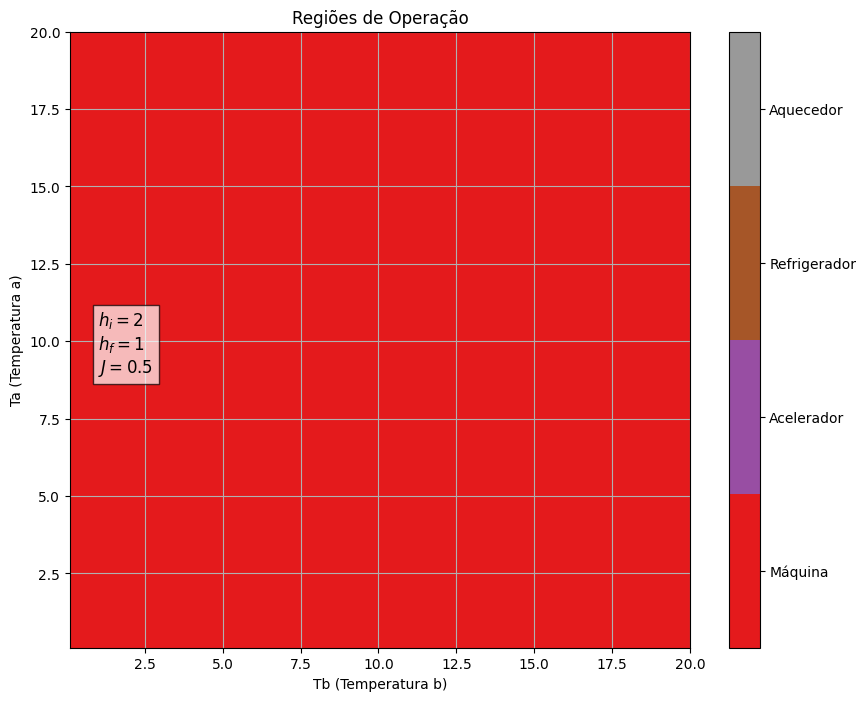

In [ ]:
J = 0
hi = 1
hf = 2
Tc = 0
Th = 0
ENTROPY = 1
INTERVAL = 100
initialOrFinal = -1

TaXTb(J, hi, hf, INTERVAL)